___


- THIS NOTEBOOK MY PERSONAL COPY BASED ON THE NOTEBOOK FROM STUDY GROUPS ON 01/08/2020 and 01/09/2020
___


# NOTES FROM JAMES:
Study Group 01/02/20

1. Make sure you **READ, FORK, and CLONE** the official [Mod 4 Project Lesson Repo](https://learn.co/tracks/data-science-career-v2/module-4-a-complete-data-science-project-using-multiple-regression/end-of-module-4-project/module-4-final-project)
2. Make sure to replace the original `melt_df` function with fixed version.
3. Make sure to consult the [Project Rubric](https://github.com/learn-co-students/dsc-mod-4-project-online-ds-ft-100719/blob/master/module4_project_rubric.pdf)
4. For forecasting into the future & using train_test_split:
    - First split data into train and test sets.
    - After training model, get predictions for test set.
    - Get another set of predictions built off of train+test set combined.
    
5. **If you use this notebook as a starting point, the only function you may use as-is in your personal project notebook is the `melt_data` function.**
    - **You MUST either significantly edit and document the functions we wrote together OR (ideally) write your own functions.**
    ___

# Mod 4 Project - Starter Notebook




This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-online-ds-ft-100719/master/images/df_head.png">
You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-online-ds-ft-100719/master/images/melted1.png">


There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!



# Step 1: Load the Data/Filtering for Chosen Zipcodes

# LOADING IN BALTIMORE CRIME DATA FOR CLASS

In [1]:
# !pip install -U fsds
# from fsds.imports import *
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Project Notebook Settings
pd.set_option('display.max_columns',0)

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-poster')

In [9]:
import fsds as fs
df = fs.datasets.load_ts_baltimore_crime_counts(
    read_csv_kwds={'parse_dates':['datetime']})
df.set_index('datetime',drop=False,inplace=True)
df

,datetime,AGG. ASSAULT,ARSON,AUTO THEFT,BURGLARY,COMMON ASSAULT,HOMICIDE,LARCENY,LARCENY FROM AUTO,RAPE,ROBBERY - CARJACKING,ROBBERY - COMMERCIAL,ROBBERY - RESIDENCE,ROBBERY - STREET,SHOOTING
datetime,,,,,,,,,,,,,,,
2014-01-01,2014-01-01,22,0,9,20,19,2,34,15,3,0,2,1,8,2
2014-01-02,2014-01-02,6,0,7,28,23,3,26,10,0,1,1,1,4,0
2014-01-03,2014-01-03,11,0,3,13,17,1,16,6,0,0,1,1,2,1
2014-01-04,2014-01-04,14,0,14,20,23,0,23,15,0,0,1,1,7,0
2014-01-05,2014-01-05,9,0,11,14,22,0,19,13,1,2,0,1,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-10,2019-12-10,17,0,9,14,12,1,26,11,0,1,0,5,7,3
2019-12-11,2019-12-11,16,0,14,7,15,0,23,7,0,1,0,1,4,5
2019-12-12,2019-12-12,9,1,11,8,18,0,16,7,0,0,1,0,5,1


In [14]:
import plotly.express as px
import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [19]:
plot_cols =[col for col in df.drop('datetime',axis=1).columns]
plot_cols

['AGG. ASSAULT',
 'ARSON',
 'AUTO THEFT',
 'BURGLARY',
 'COMMON ASSAULT',
 'HOMICIDE',
 'LARCENY',
 'LARCENY FROM AUTO',
 'RAPE',
 'ROBBERY - CARJACKING',
 'ROBBERY - COMMERCIAL',
 'ROBBERY - RESIDENCE',
 'ROBBERY - STREET',
 'SHOOTING']

In [22]:
fig = px.line(df,x='datetime',y=plot_cols,
             template='plotly_dark')
fig

In [2]:
## Import Your Mod 4 Functions (if you have them in a .py file)
# import instructor_notebooks.functions_mod4proj as ji
# help(ji)

## LIMITING DF TO JUST STATE OF MD

In [2]:
%ls ../

ANNs/                                sect_29_decision_trees/
Google_Colab_notebooks/              sect_29_decision_trees_070620PT/
Images/                              sect_37_intro_to_time_series/
Mod 4 Project/                       sect_38_time_series_models/
README.md                            sect_39_NLP/
appendix_deep_nlp/                   sect_40-42_bio_neural_networks.pptx
example-change.txt                   sect_40_neural_networks/
py_files/                            sect_41_deep_neural_networks/
sect_25_logistic_regression/         sect_42_tuning_neural_networks/
sect_27_KNN/                         sect_42_tuning_neural_networks_old/


In [4]:
# file = "../Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_raw_mon.xlsx"
# df = pd.read_excel(file)

#### Added url to fresh dataset from zillow
https://www.zillow.com/research/data/

In [5]:
# df = pd.read_csv(file)#'https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-online-ds-ft-100719/master/zillow_data.csv')#'zillow_data.csv')
new_dataset = "http://files.zillowstatic.com/research/public_v2/zhvi/Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv"
df = pd.read_csv(new_dataset)
## LIMITING DATASET TO MD
# df = df.groupby('State').get_group("MD")
df.head().style.set_caption("ORIGINAL WIDE FORMAT")

In [6]:
# fs.quick_refs.ts_pandas_freq_aliases()

In [7]:
def melt_data(df_,new=True):
    
    if new:
        df = df_.drop(columns=['RegionType','StateName'])

    else:
        df = df_
    melted = pd.melt(df, id_vars=['RegionID','RegionName', 'City', 'State', 'Metro', 'CountyName', 
                                  'SizeRank'], var_name='Month', value_name='MeanValue')
    melted['Month'] = pd.to_datetime(melted['Month'], format='%Y-%m')
    melted = melted.dropna(subset=['MeanValue'])
    return melted

In [8]:
df = melt_data(df)
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Month,MeanValue
0,61639,10025,New York,NY,New York-Newark-Jersey City,New York County,0,1996-01-31,223469.0
1,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,1,1996-01-31,205864.0
2,61637,10023,New York,NY,New York-Newark-Jersey City,New York County,2,1996-01-31,227596.0
3,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,3,1996-01-31,202808.0
4,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,4,1996-01-31,276752.0


In [9]:
df['State'].value_counts(1)

NY    0.071650
CA    0.062597
PA    0.057025
TX    0.054888
OH    0.044613
FL    0.038887
IL    0.038886
MI    0.032202
NC    0.027976
VA    0.027577
GA    0.026719
MN    0.026481
IA    0.025298
TN    0.025033
MO    0.024884
IN    0.023983
NJ    0.023632
OK    0.023145
WI    0.023044
KY    0.021517
MA    0.020164
WA    0.020021
MD    0.018959
AR    0.018651
CO    0.017519
AL    0.017420
WV    0.014950
OR    0.014196
SC    0.013085
AZ    0.012541
NE    0.012174
KS    0.012081
ME    0.011865
LA    0.011591
VT    0.009414
CT    0.008806
NH    0.008367
UT    0.007269
ID    0.007042
MS    0.006973
NV    0.005428
MT    0.005370
NM    0.005064
SD    0.003469
WY    0.003444
RI    0.003254
ND    0.003049
HI    0.002678
DE    0.002441
AK    0.001722
DC    0.000959
Name: State, dtype: float64

In [10]:
# NH = df[df['State'] =='NH']
# # NH['RegionName'].nunique()
# NH

In [11]:
def make_datetimeindex(df,col_to_make_index = 'Month',drop=False,verbose=True):

    df[col_to_make_index] = pd.to_datetime(df[col_to_make_index],errors='coerce')
    df = df.set_index('Month',drop=drop)
    
    if verbose:
        display(df.index)
    return df

In [12]:
df = make_datetimeindex(df)#,freq='MS')

DatetimeIndex(['1996-01-31', '1996-01-31', '1996-01-31', '1996-01-31',
               '1996-01-31', '1996-01-31', '1996-01-31', '1996-01-31',
               '1996-01-31', '1996-01-31',
               ...
               '2020-10-31', '2020-10-31', '2020-10-31', '2020-10-31',
               '2020-10-31', '2020-10-31', '2020-10-31', '2020-10-31',
               '2020-10-31', '2020-10-31'],
              dtype='datetime64[ns]', name='Month', length=6934249, freq=None)

In [13]:
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Month,MeanValue
Month,,,,,,,,,
1996-01-31,61639,10025,New York,NY,New York-Newark-Jersey City,New York County,0,1996-01-31,223469.0
1996-01-31,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,1,1996-01-31,205864.0
1996-01-31,61637,10023,New York,NY,New York-Newark-Jersey City,New York County,2,1996-01-31,227596.0
1996-01-31,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,3,1996-01-31,202808.0
1996-01-31,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,4,1996-01-31,276752.0


# Step 2: Preprocessing

In [14]:
df = df.rename({'Month':'MonthOrig'},axis=1)
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,MonthOrig,MeanValue
Month,,,,,,,,,
1996-01-31,61639,10025,New York,NY,New York-Newark-Jersey City,New York County,0,1996-01-31,223469.0
1996-01-31,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,1,1996-01-31,205864.0
1996-01-31,61637,10023,New York,NY,New York-Newark-Jersey City,New York County,2,1996-01-31,227596.0
1996-01-31,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,3,1996-01-31,202808.0
1996-01-31,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,4,1996-01-31,276752.0


In [15]:
md = df.groupby('State').get_group('MD')
md

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,MonthOrig,MeanValue
Month,,,,,,,,,
1996-01-31,66843,21234,Parkville,MD,Baltimore-Columbia-Towson,Baltimore County,78,1996-01-31,112751.0
1996-01-31,66705,20906,Silver Spring,MD,Washington-Arlington-Alexandria,Montgomery County,175,1996-01-31,162377.0
1996-01-31,67010,21740,Hagerstown,MD,Hagerstown-Martinsburg,Washington County,220,1996-01-31,96758.0
1996-01-31,66785,21117,Owings Mills,MD,Baltimore-Columbia-Towson,Baltimore County,247,1996-01-31,156743.0
1996-01-31,66683,20878,Gaithersburg,MD,Washington-Arlington-Alexandria,Montgomery County,299,1996-01-31,232881.0
...,...,...,...,...,...,...,...,...,...
2020-10-31,66968,21670,Sudlersville,MD,Baltimore-Columbia-Towson,Queen Annes County,34192,2020-10-31,129195.0
2020-10-31,66728,21020,Reisterstown,MD,Baltimore-Columbia-Towson,Baltimore County,34322,2020-10-31,322021.0
2020-10-31,66905,21542,Midland,MD,Cumberland,Allegany County,34322,2020-10-31,46359.0


In [16]:
df_city =  df.groupby('CountyName').get_group('Baltimore City')
df_county = df.groupby('CountyName').get_group('Baltimore County')

display(df_city.head(),df_city.index,df_county.head())

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,MonthOrig,MeanValue
Month,,,,,,,,,
1996-01-31,66825,21215,Baltimore,MD,Baltimore-Columbia-Towson,Baltimore City,368,1996-01-31,78509.0
1996-01-31,66834,21224,Baltimore,MD,Baltimore-Columbia-Towson,Baltimore City,484,1996-01-31,91540.0
1996-01-31,66828,21218,Baltimore,MD,Baltimore-Columbia-Towson,Baltimore City,744,1996-01-31,72169.0
1996-01-31,66816,21206,Baltimore,MD,Baltimore-Columbia-Towson,Baltimore City,783,1996-01-31,82430.0
1996-01-31,66839,21229,Baltimore,MD,Baltimore-Columbia-Towson,Baltimore City,1088,1996-01-31,82488.0


DatetimeIndex(['1996-01-31', '1996-01-31', '1996-01-31', '1996-01-31',
               '1996-01-31', '1996-01-31', '1996-01-31', '1996-01-31',
               '1996-01-31', '1996-01-31',
               ...
               '2020-10-31', '2020-10-31', '2020-10-31', '2020-10-31',
               '2020-10-31', '2020-10-31', '2020-10-31', '2020-10-31',
               '2020-10-31', '2020-10-31'],
              dtype='datetime64[ns]', name='Month', length=5713, freq=None)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,MonthOrig,MeanValue
Month,,,,,,,,,
1996-01-31,66843,21234,Parkville,MD,Baltimore-Columbia-Towson,Baltimore County,78,1996-01-31,112751.0
1996-01-31,66785,21117,Owings Mills,MD,Baltimore-Columbia-Towson,Baltimore County,247,1996-01-31,156743.0
1996-01-31,66832,21222,Dundalk,MD,Baltimore-Columbia-Towson,Baltimore County,423,1996-01-31,101372.0
1996-01-31,66838,21228,Catonsville,MD,Baltimore-Columbia-Towson,Baltimore County,861,1996-01-31,142517.0
1996-01-31,66817,21207,Lochearn,MD,Baltimore-Columbia-Towson,Baltimore County,874,1996-01-31,104773.0


In [17]:
print(f"[i] There are {df_city['RegionName'].nunique()} zipcodes in Baltimore City")
display(df_city.head())
df_city.index

[i] There are 20 zipcodes in Baltimore City


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,MonthOrig,MeanValue
Month,,,,,,,,,
1996-01-31,66825,21215,Baltimore,MD,Baltimore-Columbia-Towson,Baltimore City,368,1996-01-31,78509.0
1996-01-31,66834,21224,Baltimore,MD,Baltimore-Columbia-Towson,Baltimore City,484,1996-01-31,91540.0
1996-01-31,66828,21218,Baltimore,MD,Baltimore-Columbia-Towson,Baltimore City,744,1996-01-31,72169.0
1996-01-31,66816,21206,Baltimore,MD,Baltimore-Columbia-Towson,Baltimore City,783,1996-01-31,82430.0
1996-01-31,66839,21229,Baltimore,MD,Baltimore-Columbia-Towson,Baltimore City,1088,1996-01-31,82488.0


DatetimeIndex(['1996-01-31', '1996-01-31', '1996-01-31', '1996-01-31',
               '1996-01-31', '1996-01-31', '1996-01-31', '1996-01-31',
               '1996-01-31', '1996-01-31',
               ...
               '2020-10-31', '2020-10-31', '2020-10-31', '2020-10-31',
               '2020-10-31', '2020-10-31', '2020-10-31', '2020-10-31',
               '2020-10-31', '2020-10-31'],
              dtype='datetime64[ns]', name='Month', length=5713, freq=None)

### Make BCTY (dict of zipcode dfs)

In [18]:
BCTY = {}
for zipcode in df_city['RegionName'].unique():
    temp = df_city.groupby("RegionName").get_group(zipcode)
    BCTY[zipcode]=temp.resample('MS').mean()
BCTY

{21215:             RegionID  RegionName  SizeRank  MeanValue
 Month                                                
 1996-01-01     66825       21215       368    78509.0
 1996-02-01     66825       21215       368    78290.0
 1996-03-01     66825       21215       368    78072.0
 1996-04-01     66825       21215       368    77651.0
 1996-05-01     66825       21215       368    77429.0
 ...              ...         ...       ...        ...
 2020-06-01     66825       21215       368   141291.0
 2020-07-01     66825       21215       368   141581.0
 2020-08-01     66825       21215       368   142842.0
 2020-09-01     66825       21215       368   144884.0
 2020-10-01     66825       21215       368   147756.0
 
 [298 rows x 4 columns],
 21224:             RegionID  RegionName  SizeRank  MeanValue
 Month                                                
 1996-01-01     66834       21224       484    91540.0
 1996-02-01     66834       21224       484    91388.0
 1996-03-01     66834   

# Step 3: EDA and Visualization

[21215, 21224, 21218, 21206, 21229, 21230, 21217, 21239, 21212, 21201, 21213, 21216, 21202, 21223, 21211, 21231, 21214, 21210, 21226, 21205]


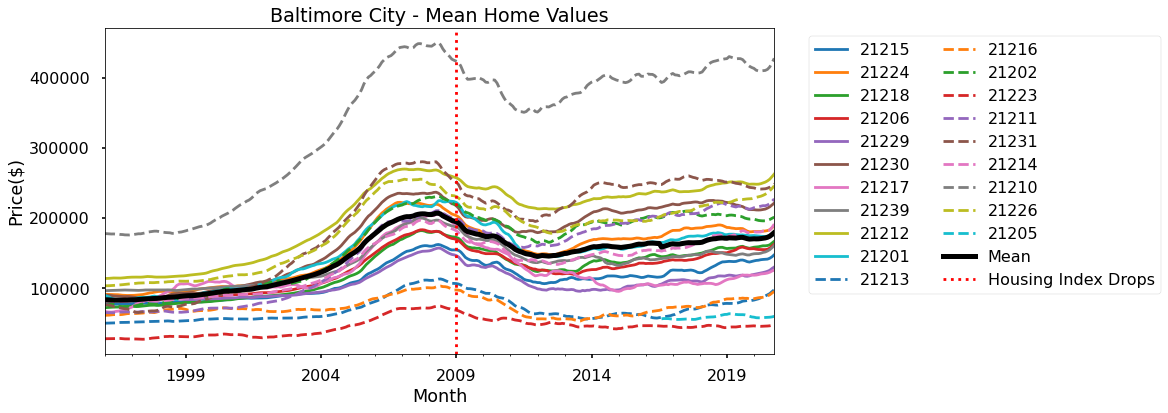

In [19]:
# ts =df2['MeanValue'].loc[21201]
def plot_ts_dict(df_dict,col='MeanValue',zipcodes=[]):
    
    if len(zipcodes)==0:
        zipcodes=list(df_dict.keys())
        
    print(zipcodes)
    
    cutoff = len(zipcodes)//2
    
        
    fig,ax = plt.subplots(figsize=(12,6))
    
    ts_dict = {}
    for i,zc in enumerate(zipcodes):
        if i <cutoff:
            ls='-'
        else:
            ls='--'
            
        ts = df_dict[zc][col].rename(zc)#.loc[zc]
        ts.plot(label=str(zc),ax=ax,ls=ls)
        ts_dict[zc] = ts

    ## CALCULTE MEAN   
    mean = pd.DataFrame(ts_dict).mean(axis=1)
    mean.plot(label='Mean',lw=5,color='black')

    crash = '01-2009'
    ax.axvline(crash, label='Housing Index Drops',color='red',ls=':')

    ax.legend(bbox_to_anchor=(1.04,1), loc="upper left", ncol=2)
    ax.set(title='Baltimore City - Mean Home Values',
          ylabel='Price($)')

    return fig,ax,ts_dict
fig,ax,tsdict = plot_ts_dict(BCTY)

## 01/09/2020

- Let's analyze Blatimore City vs Baltimore County

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
from  statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import autocorrelation_plot,lag_plot

In [21]:
def plot_acf_pacf(ts, figsize=(10,8),lags=20):
    fig,ax = plt.subplots(nrows=3,figsize=figsize)
    ts.plot(ax=ax[0])
    plot_acf(ts,ax=ax[1],lags=lags)
    plot_pacf(ts, ax=ax[2],lags=lags) 
    fig.tight_layout()
    
    fig.suptitle(f"Zipcode: {ts.name}",y=1.1,fontsize=20)
    
    for a in ax[1:]:
        a.xaxis.set_major_locator(mpl.ticker.MaxNLocator(min_n_ticks=lags, integer=True))
        a.xaxis.grid()
    

In [22]:
zips = list(tsdict.keys())
zips

[21215,
 21224,
 21218,
 21206,
 21229,
 21230,
 21217,
 21239,
 21212,
 21201,
 21213,
 21216,
 21202,
 21223,
 21211,
 21231,
 21214,
 21210,
 21226,
 21205]


## ACF and PACF intuition for AR(p) and MA(q)

A quick overview of how higher order models affect the ACF and PACF functions

### AR(p)

Considering a time series that was generated by an autoregression (AR) process with an order of p, we would expect the ACF plot for the AR(p) time series to be strong to a lag of p and remain stagnant for subsequent lag values, trailing off at some point as the effect is weakened. The PACF, on the other hand, describes the direct relationship between an observation and its lag. This generally leads to no correlation for lag values beyond p.

### MA(q)

With a time series generated by a moving average (MA) process with an order q, we would expect the ACF for the MA(q) process to show a strong correlation with recent values up to the lag of q, then an immediate decline to minimal or no correlation. For the PACF, we would expect the plot to show a strong relationship to the lag and then a tailing off to no correlation from the lag onwards.


## ARMA models

Now that we've seen AR and MA models, it is important to note that **there is no reason why AR and MA models would not coexist**. That's where ARMA models come in, which basically means that in this model, a regression on past values takes place (AR part) and also that the error term is modeled as a linear combination of error terms of the recent past (MA part).
Generally, one denotes ARMA as ARMA(p,q).

An ARMA(2,1) model is given by:


 $$Y_t = \mu + \phi_1 Y_{t-1}+\phi_2 Y_{t-2}+ \theta \epsilon_{t-1}+\epsilon_t$$


A short table to summarize ACF and PACF for AR(p), MA(q) and ARMA(p,q):


| Stat | AR(p)   |   MA(q)  | ARMA(p,q)|
|------|------|------|------|
|   ACF | Tails off   |  Cuts off after lag q |  Tails off   |
|   PACF | Cuts off after lag p  |   Tails off  |  Tails off  |

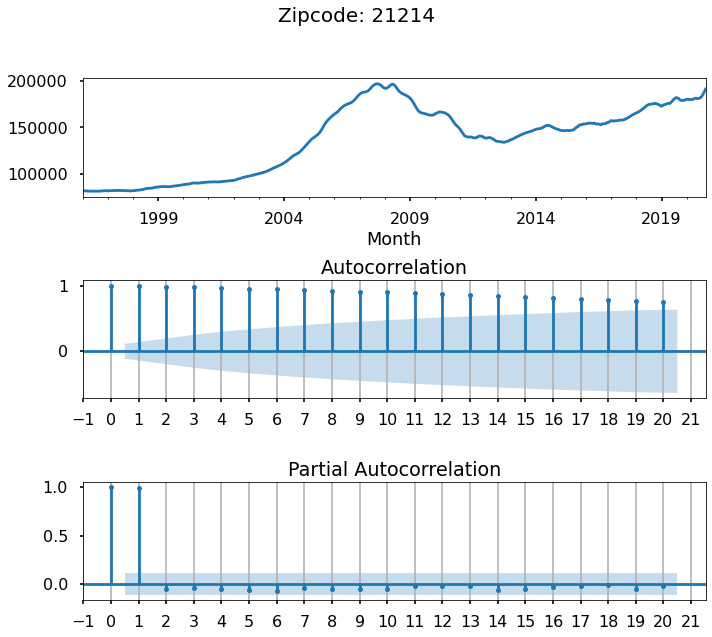

In [23]:
ts = tsdict[ np.random.choice(zips)]
plot_acf_pacf(ts)

### UPDATED INFO ON READING PACF/ACF FOR AR/MA
- **USE ACF TO JUDGE IF MA OR AR COMPONENTS:**
    - If lag 1 is positive: AR
    - If lag 1 is negatige: MA
    
- **PACF is best for picking AR (p)**
- **ACF is best for picking MA(q)**
    - If sharp drop off at lag of k (k= point on x axis) means use an AR model of order k.
    - If slow gradual decline: use MA
    
    
___
INFO FROM LESSONS:

- AR(p):
    - ACF for AR(p) would be strong until lag of p, then stagnant, then trail off. 
    - PACF for AR(p): Generally no correlation for lag values beyond p.
- MA(q):
    - ACF for MA(q) would show strong correlation up to a lag of q, the immedately delcine to minimal/no correction.
    - PACF would show strong relationship to the lag and tailing off to no correlation afterwards.
   
- Notation is generally ARMA(p,q)
- Example: ARMA(2,1) model equation
     $$Y_t = \mu + \phi_1 Y_{t-1}+\phi_2 Y_{t-2}+ \theta \epsilon_{t-1}+\epsilon_t$$

| Param| AR(p)   |   MA(q)  | ARMA(p,q)|
|------|------|------|------|
|   ACF | Tails off   |  Cuts off after lag q |  Tails off   |
|   PACF | Cuts off after lag p  |   Tails off  |  Tails off  |
    

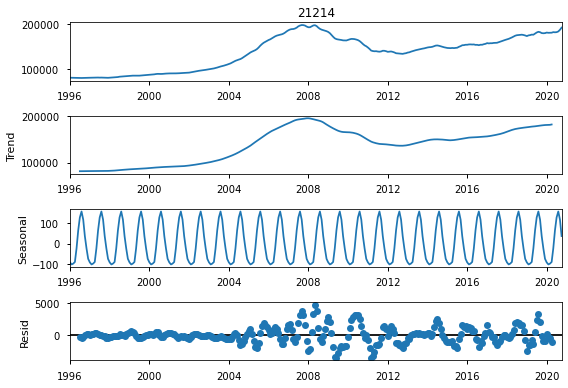

In [24]:
plt.style.use('seaborn-notebook')
# mpl.rcParams['figure.figsize']=(12,5)

decomp = seasonal_decompose(ts)
decomp.plot();
plt.tight_layout()

# Step 5: ARIMA Modeling

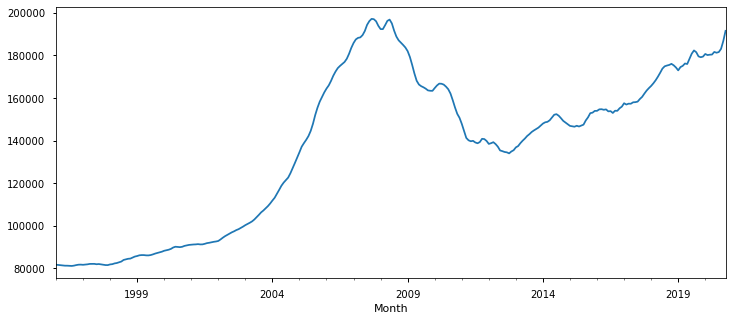

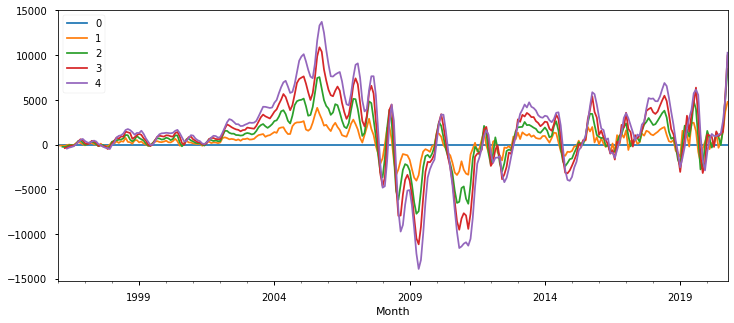

In [25]:
mpl.rcParams['figure.figsize']=(12,5)
ts.plot( )
plt.figure()
for i in range(5):
    ax = ts.diff(i).plot(label=i)
#     ax.set
ax.legend()

In [26]:
# import itertools

# p_range = range(0,10)
# q_range = range(0,10)
# d_range=range(1,3)
# m_range=(0,6,12)

# pdq = list(itertools.product(p_range,d_range,q_range))
# PDQM = list(itertools.product(p_range,d_range,q_range,m_range))
# PDQM[:10]

In [27]:
def make_pdq_pdqm(ps=[0,1,3],ds=[0,1,2,3], 
                  qs=[0,1,3],make_seasonal=True,
                  m_values=[6,12]):
    import itertools
#     ps =range(p_range[0],p_range[1])
#     ds =range(d_range[0],d_range[1])
#     qs =range(q_range[0],q_range[1])
    
    params = {}
    params['pdq'] = list(itertools.product(ps,ds,qs))
    
    if make_seasonal:
        params['PDQm'] = list(itertools.product(ps,ds,qs,m_values))
    return params

# fs.ihelp(ji.get_train_test_split_index,0)
def get_train_test_split_index(ts, TEST_SIZE=0.1,min_test_ts=2):
    import math
    idx_split = math.floor(len(ts.index)*(1-TEST_SIZE))
    
    num_test_ts=len(ts.iloc[idx_split:])
    if num_test_ts<min_test_ts:
        print(f'[!] Warning: using TEST_SIZE={TEST_SIZE} produced {num_test_ts} test timestamps.')
        print("- Overriding TEST_SIZE and using min_test_ts instead.")
        idx_split = len(ts)-min_test_ts
    
    return idx_split


def train_test_split_ts(ts,test_size=0.2,min_test_ts=2):
    idx_split = get_train_test_split_index(ts,TEST_SIZE=test_size,
                                           min_test_ts=min_test_ts)
    ts_train = ts.iloc[:idx_split]
    ts_test = ts.iloc[idx_split:]
    return ts_train, ts_test

def get_now(return_dt = True, return_str=True, show=False):
    import datetime as dt
    import tzlocal as tz
    now=dt.datetime.now(tz=tz.get_localzone())
    str_time =now.strftime('%m/%d/%Y - %I:%M:%S %p')
    if show:
        print(str_time)
    
    output=[]
    if return_dt:
        output.append(now)
        
    if return_str:
        output.append(str_time)
    return output[:]


    

In [28]:
params = make_pdq_pdqm()
print(params.keys())
print(params['pdq'][:10])
params['PDQm'][:10]

dict_keys(['pdq', 'PDQm'])
[(0, 0, 0), (0, 0, 1), (0, 0, 3), (0, 1, 0), (0, 1, 1), (0, 1, 3), (0, 2, 0), (0, 2, 1), (0, 2, 3), (0, 3, 0)]


[(0, 0, 0, 6),
 (0, 0, 0, 12),
 (0, 0, 1, 6),
 (0, 0, 1, 12),
 (0, 0, 3, 6),
 (0, 0, 3, 12),
 (0, 1, 0, 6),
 (0, 1, 0, 12),
 (0, 1, 1, 6),
 (0, 1, 1, 12)]

### Old Grid Search Functions

In [29]:
# def get_now(return_dt = True, return_str=True, show=False):
#     import datetime as dt
#     import tzlocal as tz
#     now=dt.datetime.now(tz=tz.get_localzone())
#     str_time =now.strftime('%m/%d/%Y - %I:%M:%S %p')
#     if show:
#         print(str_time)
    
#     output=[]
#     if return_dt:
#         output.append(now)
        
#     if return_str:
#         output.append(str_time)
#     return output[:]


# from statsmodels.tsa.statespace.sarimax import SARIMAX
# def grid_search_sarimax(ts_train,pdq=None,pdqm=None,order_dict=None,
#                         verbose=False, model_kws={}):

#     from tqdm import trange
    
#     if (pdq is None) & (order_dict is not None):
#         pdq= order_dict['pdq']
#     if (pdqm is None) & (order_dict is not None):
#         pdqm= order_dict['PDQm']

# #     import tqdm
# #     from tqdm import trange

#     start,start_str = get_now(return_dt=True, return_str=True)
#     print(f'[i] STARTING GRID SEARCH @ {start_str}:')

#     res = [['pdq','PDQM','AIC']]
#     for i in trange((len(pdq))):
#         comb = pdq[i]
        
#         for combs in pdqm:
#             try: 
#                 model = SARIMAX(ts_train, order=comb, 
#                                seasonal_order =combs,enforce_stationarity=False,
#                                enforce_invertibility=False,**model_kws)
                
#                 output= model.fit()
#                 res.append([comb,combs,output.aic])
#             except:
#                 if verbose:
#                     print(f"[!] Error running ({comb})({combs})")
#                 continue
#     end,end_str = get_now(return_dt=True, return_str=True)
#     elapsed = end-start
#     print(f"[i] GRID SEARCH FINISHED AT {end_str}")
#     print(f"\tTotal Time: {elapsed}")

#     try:
#         df_res =fs.list2df(res)
#         return df_res
    
#     except:
#         print('Error converting to df. Returning as list.')
#         return res 

In [30]:
# res = grid_search_sarimax(ts_train,order_dict=params)#pdq,pdqm)
# res

### New Grid Search Functions

In [31]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
def grid_search_arima_optional_s(ts_train,pdq=None,pdqm=None,order_dict=None,
                                 make_seasonal=False, verbose=False, model_kws={}):

    from tqdm import trange
    
    if (pdq is None) & (order_dict is not None):
        pdq= order_dict['pdq']
    if (pdqm is None) & (order_dict is not None):
        pdqm= order_dict['PDQm']

#     import tqdm
#     from tqdm import trange

    start,start_str = get_now(return_dt=True, return_str=True)
    print(f'[i] STARTING GRID SEARCH @ {start_str}:')
    
    
    res = [['pdq','PDQM','AIC']]
    for i in trange((len(pdq))):
        comb = pdq[i]
        
     
        ## BRANCH POINT
        if make_seasonal:
            for combs in pdqm:
                try: 
                    model = SARIMAX(ts_train, order=comb, 
                                   seasonal_order =combs,enforce_stationarity=False,
                                   enforce_invertibility=False,**model_kws)

                    output= model.fit()
                    res.append([comb,combs,output.aic])
                except:
                    if verbose:
                        print(f"[!] Error running ({comb})({combs})")
                    continue
                    
                    
        if make_seasonal == False:
            try: 
                model = SARIMAX(ts_train, order=comb, 
                                enforce_stationarity=False, 
                                enforce_invertibility=False,**model_kws)

                output= model.fit()
                res.append([comb,'N/A',output.aic])
            except:
                if verbose:
                    print(f"[!] Error running ({comb})({combs})")
                    continue
                    
    end,end_str = get_now(return_dt=True, return_str=True)
    elapsed = end-start
    print(f"[i] GRID SEARCH FINISHED AT {end_str}")
    print(f"\tTotal Time: {elapsed}")

    try:
        df_res =pd.DataFrame(res[1:], columns=res[0])
        return df_res
    
    except:
        print('Error converting to df. Returning as list.')
        return res 

### Testing on Single Zipcode

In [32]:
ts = tsdict[21201]
ts_train,ts_test = train_test_split_ts(ts,test_size=0.1)

len(ts_train),len(ts_test)

(268, 30)

In [33]:
res = grid_search_arima_optional_s(ts_train,order_dict=params,
                                   make_seasonal=False)#pdq,pdqm)
res.sort_values('AIC',inplace=True)
res

  0%|          | 0/36 [00:00<?, ?it/s]

[i] STARTING GRID SEARCH @ 11/29/2020 - 11:32:27 AM:


 69%|██████▉   | 25/36 [00:01<00:00, 21.08it/s]/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
100%|██████████| 36/36 [00:02<00:00, 12.28it/s]

[i] GRID SEARCH FINISHED AT 11/29/2020 - 11:32:30 AM
	Total Time: 0:00:02.935078


,pdq,PDQM,AIC
29,"(3, 1, 3)",N/A,4184.919625
5,"(0, 1, 3)",N/A,4200.321199
20,"(1, 2, 3)",N/A,4216.461040
32,"(3, 2, 3)",N/A,4216.585701
8,"(0, 2, 3)",N/A,4217.211004
17,"(1, 1, 3)",N/A,4221.494741
26,"(3, 0, 3)",N/A,4225.795113
35,"(3, 3, 3)",N/A,4226.251989
30,"(3, 2, 0)",N/A,4230.150281
31,"(3, 2, 1)",N/A,4231.729422


In [34]:
best_params =  dict(order=res.iloc[0].loc['pdq'])
best_params

{'order': (3, 1, 3)}

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  21201   No. Observations:                  268
Model:               SARIMAX(3, 1, 3)   Log Likelihood               -2085.460
Date:                Sun, 29 Nov 2020   AIC                           4184.920
Time:                        11:39:47   BIC                           4209.925
Sample:                    01-01-1996   HQIC                          4194.969
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3717      0.099      3.771      0.000       0.179       0.565
ar.L2          0.0889      0.059      1.519      0.129      -0.026       0.204
ar.L3          0.1533      0.062      2.463      0.014       0.031       0.275
ma.L1          0.9090      0.157      5.780      0.000       0.601       1.217
ma.L2          0.9423      0.260      3.619      0.000       0.432       1.453
ma.L3         -0.0560      0.113     -0.497      0.619      -0.277       0.165
sigma2      5.001e+05   1.27e+05      3.953      0.000    2.52e+05    7.48e+05
===================================================================================
Ljung-Box (Q):                      121.78   Jarque-Bera (JB):                 7.84
Prob(Q):                              0.00   Prob(JB):                         0.02
Heteroskedasticity (H):               1.92   Skew:                            -0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

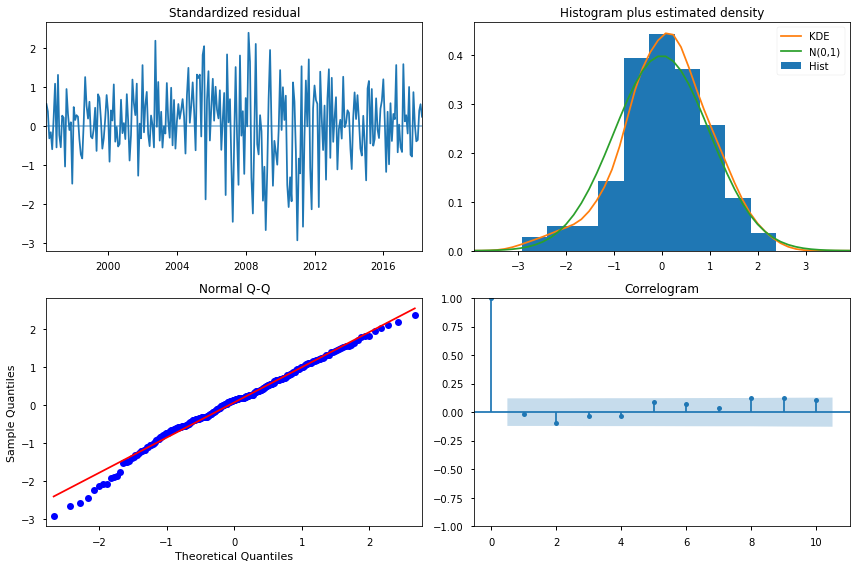

In [35]:
model_output = SARIMAX(ts_train,**best_params,
                      enforce_invertibility=False,
                      enforce_stationarity=False,).fit()
display(model_output.summary())
model_output.plot_diagnostics(figsize=(12,8));
plt.tight_layout()

### def roi and model evaluation functions

In [36]:
def model_evaluation(ts_true,ts_pred,show=True,show_u_info=False):
    from sklearn.metrics import mean_squared_error,r2_score

    res= [['Metric','Value']]
    
    res.append(['RMSE', np.sqrt(mean_squared_error(ts_true,ts_pred))])
    
    res.append(['R2',r2_score(ts_true,ts_pred)])
    res.append(["Thiel's U",fs.jmi.thiels_U(ts_true,ts_pred,
                                            display_equation=show_u_info,
                                           display_table=show_u_info)])
    res = pd.DataFrame(res[1:],columns=res[0])#fs.list2df(res)
    
    if show:
        display(res)
    return res
    
def expected_roi(investment, final_value):
    """This function takes in a series of forecasts to predict the return
    on investment spanning the entire forecast."""
    roi = np.round(((final_value - investment) / investment)*100,3)
    return roi


In [ ]:
def get_model_preds_df(model_output,ts_train,ts_test,start=None,end=None, get_metrics=True):
    
    if start is None:
        start=ts_test.index[0]
        
    if end is None:
        end=ts_test.index[-1]    
    # Get predictions starting from 2016 and calculate confidence intervals.
    prediction = model_output.get_prediction(start=start,end=end, 
                                             dynamic=True)
    
    
    preds_df = prediction.conf_int()
    preds_df['predicted_mean'] = prediction.predicted_mean
    plot_df = pd.concat([preds_df,ts_train],axis=1)

    
    ## Get roi for preds:
    roi = expected_roi(preds_df['predicted_mean'].iloc[0],preds_df['predicted_mean'].iloc[-1])
    
    zc =ts_train.name
    
    fig, ax = plt.subplots()
    ts_train.plot(ax=ax,label='Training Data')
    ts_test.plot(ax=ax,label='Test Data')

    
    preds_df['predicted_mean'].plot(ax=ax)
    ax.fill_between(preds_df.index, preds_df[f'lower {zc}'],
                preds_df[f'upper {zc}'], color="k", alpha=.15,
                label = 'confidence interval')

    prediction.predicted_mean.plot(ax=ax,label='Predicted')
    
    
    ax.legend()
    ax.set(title=f"Predictions for {zc}: ROI = {roi}%")
    
    fig = ax.get_figure()
    
    
    plot_df['zipcode']=ts_train.name
    plt.show()
    
    if get_metrics:
        res = model_evaluation(ts_test, preds_df['predicted_mean'])
#         res['Metric']

    return preds_df, fig,ax
    
preds_df,fig,ax = get_model_preds_df(model_output,ts_train,ts_test)
preds_df

### 21202

In [ ]:
# zipname = 21202
# zip21202 = {}
# zip21202['ts'] = tsdict[zipname].loc['2009':]
# for k,v in ts_resdict[zipname].items():
    
#     zip21202[k]  = v
# zip21202.keys()

In [ ]:
# pred = zip21202['model'].get_forecast(32)
# pred.conf_int()

In [ ]:

# f,ax = plt.subplots()
# zip21202['ts'].plot(ax=ax,label=zipname)
# zip21202['preds_df']['predicted_mean'].plot(ax=ax,label='prediction')
# ax.fill_between(zip21202['preds_df'].index, zip21202['preds_df'][f'lower {zipname}'],
#                 zip21202['preds_df'][f'upper {zipname}'], color="k", alpha=.15,
#                 label = 'confidence interval')
# ax.legend()

## META GRID SEARCH

In [ ]:
fig,ax,tsdict = plot_ts_dict(BCTY)

In [ ]:
print(ts.index[0])
ts.index[0]+ pd.to_timedelta(1,'MS')
end=ts.index[0]+ pd.to_timedelta(1,'MS')
pd.to_datetime(end)

In [ ]:
### META SERACH
params = make_pdq_pdqm()

ts_resdict = {}
for zc,ts in tsdict.items():
    print('\n')
    print('---'*30)
    print('---'*30)
    print(f'ZIPCODE: {zc}')
    ## Train test split
    ts_train,ts_test = train_test_split_ts(ts,test_size=0.1)
    

    ## Grid search
    res = grid_search_arima_optional_s(ts_train,order_dict=params,make_seasonal=False)#pdq,pdqm)
    res.sort_values('AIC',inplace=True)
    best_params =  dict(order=res.iloc[0].loc['pdq'])
    
    ts_resdict[zc]={}
    ts_resdict[zc]['res']=res
    ts_resdict[zc]['best_params'] = best_params
    print('Best params: ',best_params)
    

    ## Using best params
    model_output = SARIMAX(ts_train,**best_params,
                      enforce_invertibility=False,
                      enforce_stationarity=False).fit()
    ts_resdict[zc]['model'] = model_output
    
    preds_df,fig,ax = get_model_preds_df(model_output,ts_train,ts_test)
    ts_resdict[zc]['preds_df'] = preds_df


In [ ]:
# ts_resdict.keys()
# ts_resdict[21215].keys()
# ts_resdict[21215]['preds_df']

# Step 6: Interpreting Results

## ADDING FORECAST BASED ON FULL DATA INTO FUTURE

In [ ]:
### META SERACH
params = make_pdq_pdqm()

ts_resdict = {}
for zc,ts in tsdict.items():
    print('\n')
    print('---'*30)
    print('---'*30)
    print(f'ZIPCODE: {zc}')
    ## Train test split
    ts_train,ts_test = train_test_split_ts(ts,test_size=0.1)
    

    ## Grid search
    res = grid_search_arima_optional_s(ts_train,order_dict=params,make_seasonal=False)#pdq,pdqm)
    res.sort_values('AIC',inplace=True)
    best_params =  dict(order=res.iloc[0].loc['pdq'])
    
    ts_resdict[zc]={}
    ts_resdict[zc]['res']=res
    ts_resdict[zc]['best_params'] = best_params
    print('Best params: ',best_params)
    

    ## Using best params
    model_output = SARIMAX(ts,**best_params,
                      enforce_invertibility=False,
                      enforce_stationarity=False).fit()
    ts_resdict[zc]['model'] = model_output
    
    preds_df,fig,ax = get_model_preds_df(model_output,ts_train,ts_test,
                                         start=ts.index[-1],end=ts.index.shift(12)[-1],get_metrics=False)#+ pd.to_timedelta(1,'MS'))
    ts_resdict[zc]['preds_df'] = preds_df


# END OF STUDY GROUP 01/09/2020

In [ ]:
print(ts_resdict[21202].keys())
ts_resdict[21202]['preds_df']


In [ ]:
top_params = res.sort_values('AIC').head(10)
display(top_params)
top_params=top_params.loc[top_params['AIC']>0]

best_params =  dict(order=top_params.iloc[0].loc['pdq'],
             seasonal_order = top_params.iloc[0].loc['PDQM']) 
# pd.DataFrame.from_dict(best_params)
best_params

In [ ]:
len(ts_train)

In [ ]:
best_params

In [ ]:
len(ts_train)

In [ ]:
# best_params['seasonal_order'] = (4, 1, 4, 12)
# best_params

In [ ]:
# model_output = SARIMAX(ts_train,**best_params,
#                       enforce_invertibility=False,
#                       enforce_stationarity=False).fit()


In [ ]:
forecast = model_output.forecast(steps=len(ts_test))
forecast

In [ ]:
model_output.summary()

In [ ]:
preds = model_output.predict(start=ts_test.index[0],end=ts_test.index[-1])

In [ ]:
preds

In [ ]:
f,ax=plt.subplots()
ts_train.plot(ax=ax)
ts_test.plot(ax=ax)
# forecast.plot(ax=ax,ls=':',lw=3)
preds.dropna().plot(ax=ax)
ax.legend()

In [39]:
from fsds.jmi import thiels_U

In [40]:
from sklearn.metrics import mean_squared_error,r2_score
# fs.jmi.thiels_U

def model_evaluation(ts_true,ts_pred,show=True):
    res= [['Metric','Value']]
    
    res.append(['RMSE', np.sqrt(mean_squared_error(ts_true,ts_pred))])
    
    res.append(['R2',r2_score(ts_true,ts_pred)])
    res.append(["Thiel's U",fs.jmi.thiels_U(ts_true,ts_pred)])
    res = pd.DataFrame(res[1:],columns=res[0])
    if show:
        display(res)
    return res
    
def plot_true_test_preds(ts_train,ts_test,ts_preds):
    f,ax=plt.subplots()
    ts_train.plot(ax=ax)
    ts_test.plot(ax=ax)
    # forecast.plot(ax=ax,ls=':',lw=3)
    preds.dropna().plot(ax=ax)
    ax.legend()
    return f,ax

In [41]:
model_evaluation(ts_test, preds)
plot_true_test_preds(ts_train,ts_test,preds)

NameError: name 'preds' is not defined

In [ ]:
plot_true_test_preds()